# Atividades da Semana 5

## Atividade 1

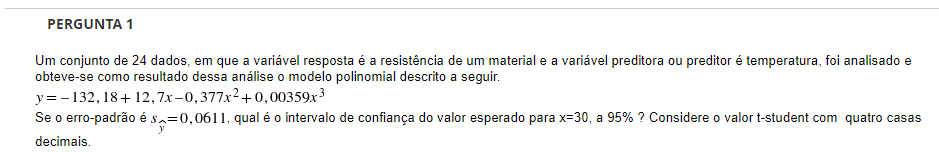

In [3]:
#Valor de x
x = 30

#Erro padrão
ep = 0.0611

In [9]:
y = -132.18 + 12.7 * x - 0.377 * x*x + 0.00359 * x*x*x
y

6.449999999999974

IC de $\mu_{Y,30}$ pode se calcular com $\hat{Y} \pm t_{\frac{\alpha}{2},(n-(k+1))} s_{\hat{Y}} $

In [10]:
#Erro padrão de y esperado
erro_y_esp = 0.0611

#Número de amostras
n = 24

#k grau do polinômio
k = 3

#graus de liberdade
gl = n - (k + 1)

In [11]:
#Encontrar t na tabela t de student
from scipy.stats import t
alpha = 0.05  # significia = 5%                                      
v = t.ppf(1 - alpha/2, gl) 
tt=v
print(f't_crit=: {v}')

t_crit=: 2.0859634472658364


In [12]:
#Calcular o intervalo

valor_desvio = tt * ep

In [13]:
#Limite maior
lim_maior = y + valor_desvio

#limite menor
lim_menor = y - valor_desvio

print(f'({lim_menor} < {y} < {lim_maior}')

(6.322547633372031 < 6.449999999999974 < 6.577452366627917


## Atividade 2

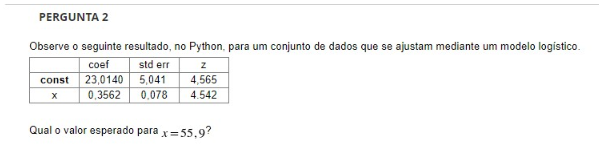

Modelo logístico:

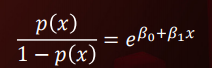

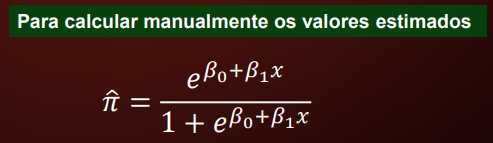

In [24]:
x = 55.9

#Regressão com os coeficientes obtidos
reg = 23.0140 + 0.3562 * x
reg

42.92558

In [23]:
#calculando a probablidade para x
from math import e

#e elevado ao resultado da reg - Numerados
e_pot = e**reg
numerador = e_pot

#denominador
denominador = 1 + e_pot

#Valor estimado para x:
valor_estimado = numerador / denominador

print(f'{valor_estimado:.4f}')

1.0000


## Atividade 3

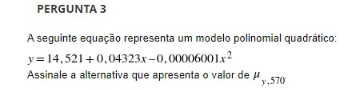

In [28]:
x = 570
y = 14.521 + 0.04323 * x - 0.00006001 * x*x

In [29]:
y

19.664850999999995

## Atividade 4

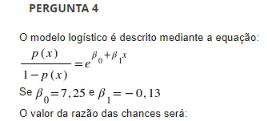

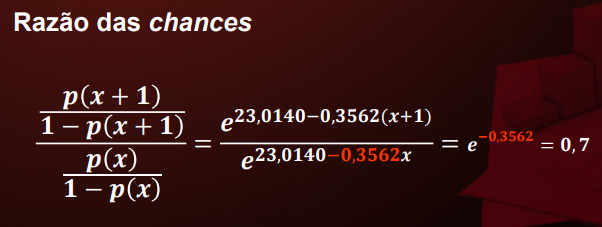

In [30]:
#razão das chances
from math import e

razao = e ** -0.13
razao


0.8780954309205613

## Atividade 7

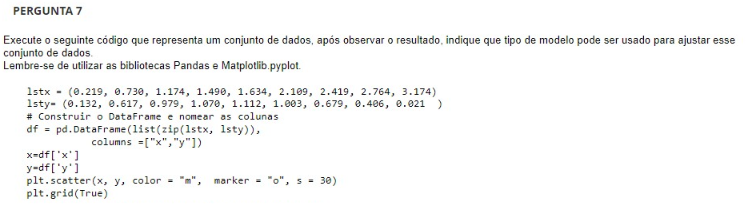

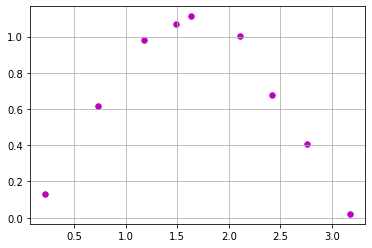

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

lstx = (0.219, 0.730, 1.174, 1.490, 1.634, 2.109, 2.419, 2.764, 3.174)
lsty= (0.132, 0.617, 0.979, 1.070, 1.112, 1.003, 0.679, 0.406, 0.021  )
# Construir o DataFrame e nomear as colunas
df = pd.DataFrame(list(zip(lstx, lsty)),
               columns =["x","y"])
x=df['x']
y=df['y']
plt.scatter(x, y, color = "m",  marker = "o", s = 30)
plt.grid(True)

Os dados podem ser representados mediante um modelo polinomial de grau 2.

## Atividade 8

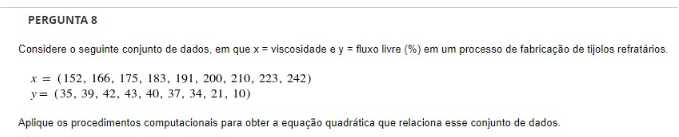

In [33]:
x = (152, 166, 175, 183, 191, 200, 210, 223, 242)
y = (35, 39, 42, 43, 40, 37, 34, 21, 10)

In [35]:
df = pd.DataFrame(list(zip(x, y)),
               columns =["x","y"])
x=df['x']
y=df['y']

df

,x,y
0,152,35
1,166,39
2,175,42
3,183,43
4,191,40
5,200,37
6,210,34
7,223,21
8,242,10


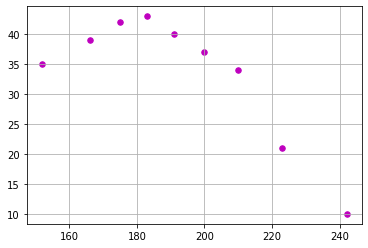

In [39]:
x=df['x']
y=df['y']
plt.scatter(x, y, color = "m",  marker = "o", s = 30)
plt.grid(True)

In [36]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
x = sm.add_constant(x)

from sklearn.preprocessing import PolynomialFeatures
#definir o valor de k, isto é o grau do polinômio
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x)
xp.shape

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(9, 6)

In [43]:
xp

array([[1.0000e+00, 1.0000e+00, 1.5200e+02, 1.0000e+00, 1.5200e+02,
        2.3104e+04],
       [1.0000e+00, 1.0000e+00, 1.6600e+02, 1.0000e+00, 1.6600e+02,
        2.7556e+04],
       [1.0000e+00, 1.0000e+00, 1.7500e+02, 1.0000e+00, 1.7500e+02,
        3.0625e+04],
       [1.0000e+00, 1.0000e+00, 1.8300e+02, 1.0000e+00, 1.8300e+02,
        3.3489e+04],
       [1.0000e+00, 1.0000e+00, 1.9100e+02, 1.0000e+00, 1.9100e+02,
        3.6481e+04],
       [1.0000e+00, 1.0000e+00, 2.0000e+02, 1.0000e+00, 2.0000e+02,
        4.0000e+04],
       [1.0000e+00, 1.0000e+00, 2.1000e+02, 1.0000e+00, 2.1000e+02,
        4.4100e+04],
       [1.0000e+00, 1.0000e+00, 2.2300e+02, 1.0000e+00, 2.2300e+02,
        4.9729e+04],
       [1.0000e+00, 1.0000e+00, 2.4200e+02, 1.0000e+00, 2.4200e+02,
        5.8564e+04]])

In [44]:
modelpo = sm.OLS(y, xp[:,3:6]).fit()
print(modelpo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     107.9
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           1.98e-05
Time:                        20:33:37   Log-Likelihood:                -17.530
No. Observations:                   9   AIC:                             41.06
Df Residuals:                       6   BIC:                             41.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -217.7008     35.473     -6.137      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
